<a href="https://colab.research.google.com/github/honor200/honor-diss/blob/main/USE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USE model with balanced dataset

In [ ]:
# import helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-09-06 14:12:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-06 14:12:53 (79.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
import pandas as pd
df = pd.read_csv('aft.csv')
df.drop(['provenance','notes','source','data_source','date_obtained'], axis = 1, inplace = True)

In [ ]:
df.head()

,atu_id,tale_title,text
0,910B,The Highlander Takes Three Advices from the En...,In one of the glens of Cantire there lived a y...
1,910B,The Prince Who Acquired Wisdom,There was once a raja who had an only son and ...
2,910B,The Three Admonitions,A man once left his country to go to foreign p...
3,910B,The Three Advices,The stories current among the Irish peasantry ...
4,910B,The Three Advices Which the King with the Red ...,"The name of the young chief was Illan, called ..."


In [ ]:
# Shuffle data
df = df.sample(frac=1, random_state=42)

In [ ]:
df.head()

,atu_id,tale_title,text
231,510A,Katie Woodencloak,"Well, after a time he fell into war with anoth..."
1217,1655,All Change,There was once a man who was the laziest man i...
1240,613,Right Always Remains Right,"There was once upon a time a huntsman, who had..."
1470,700,Tom Thumb,One day Tom's mother was making a pudding and ...
51,280A,An Ant Formerly a Man,The Moral: That which some call good husbandry...


In [ ]:
print(df['atu_id'].head(20))


231     510A
1217    1655
1240     613
1470     700
51      280A
755      313
423     1645
1249     613
1436     333
1488       2
76       361
538      480
588      706
297      231
906      954
382     1191
932      237
354      311
175     2022
49       402
Name: atu_id, dtype: object


In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'atu_id'.
df['encoded_atu_id']= label_encoder.fit_transform(df['atu_id'])


df['atu_id'].unique()

# Create a reverse mapping
reverse_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))


In [ ]:
print(label_encoder.classes_)


['1' '101' '103' '1030' '105' '112' '1137' '113A' '1157' '1161' '1174'
 '1175' '1176' '1191' '1215' '122E' '122F' '124' '1287' '1288A' '130'
 '1317' '1319' '1335A' '1342' '1343' '1351' '1353' '1362' '1365' '1377'
 '1381' '1381D' '1383' '1408' '1415' '1422' '1423' '1430' '1451' '15'
 '150' '154' '1540' '1548' '155' '1558' '156' '1562A' '1586' '1592'
 '1592B' '160' '1620' '1626' '1641' '1641C' '1645' '1645B' '1655' '1675'
 '1676' '1678' '1696' '173' '1730' '1741' '175' '178A' '1791' '1889B'
 '1965' '2' '2015' '2022' '2025' '2030' '2031C' '2032' '2034F' '2035'
 '2043' '207C' '20C' '214A' '225' '2250' '231' '237' '243A' '244' '247'
 '275' '278' '278A' '280A' '285A' '295' '298' '303' '306' '310' '311'
 '312' '313' '325' '327' '328' '332' '333' '335' '361' '365' '366' '402'
 '410' '425C' '440' '441' '451' '47A' '47B' '480' '50' '500' '502' '503'
 '505' '510A' '510B' '545B' '555' '562' '563' '565' '57' '570' '571B'
 '592' '613' '63' '650A' '66A' '670' '675' '68A' '700' '704' '706' '709'
 '720

In [ ]:
# Create a reverse mapping
reverse_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

In [ ]:
sample_items = {k: reverse_mapping[k] for k in list(reverse_mapping)[:10]}
print(sample_items)


{0: '1', 1: '101', 2: '103', 3: '1030', 4: '105', 5: '112', 6: '1137', 7: '113A', 8: '1157', 9: '1161'}


In [ ]:
# Removing text that is in class of own (necessary for oversampling)
class_counts = df['atu_id'].value_counts()
classes_with_count_1 = class_counts[class_counts == 1].index

# Create a boolean mask to filter rows with class count 1
mask = df['atu_id'].isin(classes_with_count_1)

# Remove rows with class count 1 from the dataframe
df = df[~mask]

# Print the filtered dataframe
len(df)

1508

In [ ]:
unique_atu_ids_count = df['atu_id'].nunique()
print(unique_atu_ids_count)


172


Class=128, n=21 (1.393%)
Class=59, n=8 (0.531%)
Class=139, n=13 (0.862%)
Class=146, n=21 (1.393%)
Class=95, n=11 (0.729%)
Class=57, n=26 (1.724%)
Class=109, n=12 (0.796%)
Class=72, n=10 (0.663%)
Class=111, n=8 (0.531%)
Class=122, n=18 (1.194%)
Class=148, n=17 (1.127%)
Class=87, n=12 (0.796%)
Class=174, n=10 (0.663%)
Class=13, n=15 (0.995%)
Class=88, n=5 (0.332%)
Class=102, n=10 (0.663%)
Class=74, n=5 (0.332%)
Class=114, n=19 (1.260%)
Class=25, n=4 (0.265%)
Class=176, n=11 (0.729%)
Class=17, n=9 (0.597%)
Class=92, n=31 (2.056%)
Class=164, n=12 (0.796%)
Class=49, n=15 (0.995%)
Class=12, n=8 (0.531%)
Class=3, n=11 (0.729%)
Class=154, n=8 (0.531%)
Class=75, n=13 (0.862%)
Class=133, n=7 (0.464%)
Class=153, n=12 (0.796%)
Class=113, n=16 (1.061%)
Class=35, n=4 (0.265%)
Class=149, n=5 (0.332%)
Class=126, n=16 (1.061%)
Class=30, n=5 (0.332%)
Class=157, n=30 (1.989%)
Class=115, n=3 (0.199%)
Class=37, n=8 (0.531%)
Class=165, n=5 (0.332%)
Class=90, n=9 (0.597%)
Class=138, n=18 (1.194%)
Class=143, 

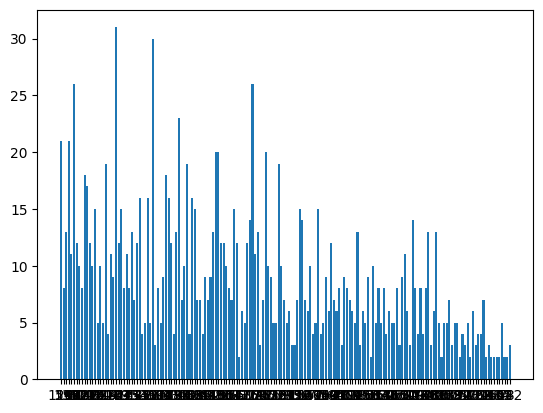

In [ ]:
# Finding the distribution of each class

from collections import Counter
import matplotlib.pyplot as plt

# split into input and output elements
X, y = df['text'], df['encoded_atu_id']


# Convert y (class labels) to strings, if they are not already strings
y = y.astype(str)

counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
len(y), len(X)

(1508, 1508)

Class=128, n=31 (0.581%)
Class=59, n=31 (0.581%)
Class=139, n=31 (0.581%)
Class=146, n=31 (0.581%)
Class=95, n=31 (0.581%)
Class=57, n=31 (0.581%)
Class=109, n=31 (0.581%)
Class=72, n=31 (0.581%)
Class=111, n=31 (0.581%)
Class=122, n=31 (0.581%)
Class=148, n=31 (0.581%)
Class=87, n=31 (0.581%)
Class=174, n=31 (0.581%)
Class=13, n=31 (0.581%)
Class=88, n=31 (0.581%)
Class=102, n=31 (0.581%)
Class=74, n=31 (0.581%)
Class=114, n=31 (0.581%)
Class=25, n=31 (0.581%)
Class=176, n=31 (0.581%)
Class=17, n=31 (0.581%)
Class=92, n=31 (0.581%)
Class=164, n=31 (0.581%)
Class=49, n=31 (0.581%)
Class=12, n=31 (0.581%)
Class=3, n=31 (0.581%)
Class=154, n=31 (0.581%)
Class=75, n=31 (0.581%)
Class=133, n=31 (0.581%)
Class=153, n=31 (0.581%)
Class=113, n=31 (0.581%)
Class=35, n=31 (0.581%)
Class=149, n=31 (0.581%)
Class=126, n=31 (0.581%)
Class=30, n=31 (0.581%)
Class=157, n=31 (0.581%)
Class=115, n=31 (0.581%)
Class=37, n=31 (0.581%)
Class=165, n=31 (0.581%)
Class=90, n=31 (0.581%)
Class=138, n=31 (0.5

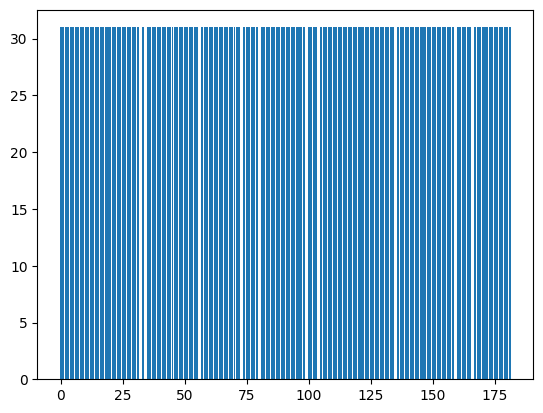

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

y = np.array(y)
y = y.astype(int)

# Convert text data (X) into numerical representations using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Oversampling the dataset using SMOTE with X_tfidf and y
oversample = SMOTE(k_neighbors=1)
X_resampled_tfidf, y_resampled = oversample.fit_resample(X_tfidf, y)

# Convert numerical representations back to strings (complete sentences)
X_resampled_sentences = [" ".join(row) for row in tfidf_vectorizer.inverse_transform(X_resampled_tfidf)]

# summarize distribution
counter = Counter(y_resampled)
for k, v in counter.items():
    per = v / len(y_resampled) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
len(y_resampled), len(X_resampled_sentences)

(5332, 5332)

In [ ]:
X_resampled_sentences[:5]

['kiss round arms glad fellow glistened sunbeams game charging dragoons regiment clattered upstairs trampling bawled since daresay true legs forward coming bore birds song understood tried women truth sang tree bird bride decked dressed feast wedding sore loathly fitted wicked small alike fair sorts whose woman wed everywhere given ordered world shoe reach combland stuck shoes midst porch poured pitch firkin stare sit sense ears times former pulpit hastened bid waiting people diamonds studded either grander something smart show foul clattering wishing scolded comb someone best become pick stooped whip riding towelland mount sermon deal soul called broke jumped wished spot churchyard standing bit broidered saddlecloth steed noble besides shone covered finer brave black business fingers smutty touched cried yourself pack fared towel without rode lady proud asking wide like seen glove whence mounted gloves hold open door ran single love deep listened wondered lovely beside saddle horse br

In [ ]:
X, y = X_resampled_sentences, y_resampled

In [ ]:
len(y_resampled), len(X)

(5332, 5332)

In [ ]:
X = np.array(X)

In [ ]:
# Create train/test data

X_train, X_test, y_train, y_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):], y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4265, 1067, 4265, 1067)

In [ ]:
# Create train/val split
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X_train,
                                                                            y_train,
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [ ]:
type(train_sentences), type(train_labels)

(numpy.ndarray, numpy.ndarray)

## Create USE Model

In [ ]:
import tensorflow_hub as hub

# Create a Keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype="string",
                                        trainable=False,
                                        name="USE")

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

In [ ]:
# Rebuilding the model without sequential API
from tensorflow.keras import layers
import tensorflow as tf

# Create model using the Sequential API
model_1 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(182, activation="softmax")
], name="model_4_USE")

# Compile model
model_1.compile(loss="sparse_categorical_crossentropy", #as data in strings not integers
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of pretrained embeddings
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=20,
                              validation_data=(val_sentences, val_labels))

Epoch 1/20
120/120 [==============================] - 15s 58ms/step - loss: 5.0522 - accuracy: 0.0274 - val_loss: 4.8469 - val_accuracy: 0.0703
Epoch 2/20
120/120 [==============================] - 8s 65ms/step - loss: 4.5950 - accuracy: 0.1483 - val_loss: 4.4639 - val_accuracy: 0.2225
Epoch 3/20
120/120 [==============================] - 7s 55ms/step - loss: 4.1738 - accuracy: 0.3200 - val_loss: 4.0784 - val_accuracy: 0.3583
Epoch 4/20
120/120 [==============================] - 8s 65ms/step - loss: 3.6982 - accuracy: 0.4169 - val_loss: 3.6414 - val_accuracy: 0.3981
Epoch 5/20
120/120 [==============================] - 8s 63ms/step - loss: 3.2150 - accuracy: 0.4739 - val_loss: 3.2215 - val_accuracy: 0.4614
Epoch 6/20
120/120 [==============================] - 7s 58ms/step - loss: 2.7941 - accuracy: 0.5276 - val_loss: 2.8620 - val_accuracy: 0.4895
Epoch 7/20
120/120 [==============================] - 8s 66ms/step - loss: 2.4553 - accuracy: 0.5657 - val_loss: 2.5706 - val_accuracy: 0.529

In [ ]:
model_1.evaluate(val_sentences, val_labels)

14/14 [==============================] - 1s 45ms/step - loss: 1.2952 - accuracy: 0.7377


[1.2951574325561523, 0.7377049326896667]

In [ ]:

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

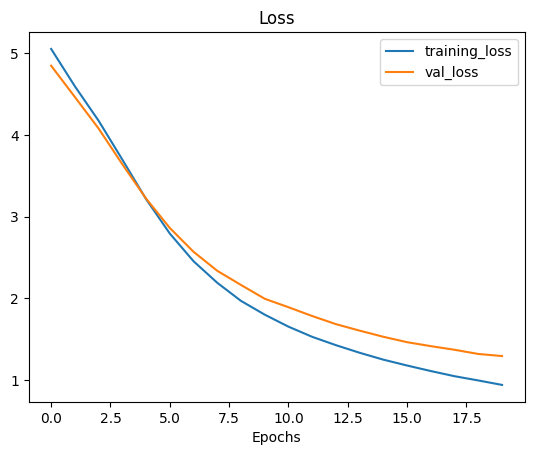

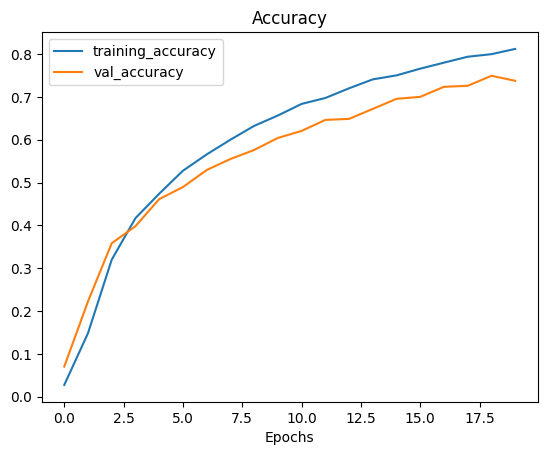

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Create model using the Sequential API
model_2 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  # layers.Dense(128, activation="relu"),
  # Dropout(0.2),
  layers.Dense(256, activation="relu"),
  Dropout(0.1),
  layers.Dense(182, activation="softmax")
], name="model_5_USE")

# Compile model
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

# Train a classifier on top of pretrained embeddings
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=100,
                              batch_size = 64,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[early_stop])

Epoch 1/100
60/60 [==============================] - 9s 103ms/step - loss: 5.0171 - accuracy: 0.0766 - val_loss: 4.7498 - val_accuracy: 0.1827
Epoch 2/100
60/60 [==============================] - 7s 115ms/step - loss: 4.4567 - accuracy: 0.2566 - val_loss: 4.2396 - val_accuracy: 0.3841
Epoch 3/100
60/60 [==============================] - 6s 96ms/step - loss: 3.9045 - accuracy: 0.4075 - val_loss: 3.7214 - val_accuracy: 0.4473
Epoch 4/100
60/60 [==============================] - 7s 118ms/step - loss: 3.3047 - accuracy: 0.5042 - val_loss: 3.1718 - val_accuracy: 0.4895
Epoch 5/100
60/60 [==============================] - 6s 93ms/step - loss: 2.7456 - accuracy: 0.5683 - val_loss: 2.6991 - val_accuracy: 0.5621
Epoch 6/100
60/60 [==============================] - 7s 118ms/step - loss: 2.3141 - accuracy: 0.6193 - val_loss: 2.3442 - val_accuracy: 0.5644
Epoch 7/100
60/60 [==============================] - 6s 93ms/step - loss: 1.9869 - accuracy: 0.6608 - val_loss: 2.0925 - val_accuracy: 0.6276
Ep

In [ ]:
model_2.evaluate(val_sentences, val_labels)

#MOST ACCURATE MODEL - no batches accuracy 0.8314
#batch_size 64 = 0.8384
#batch_size 16 = 0.8150
#batch_size 81 = 0.8337
##batch_size 70 = 0.8150
##batch_size 65 = 0.8290
#batch_size 63 = 0.8080
#batch_size 32 = 0.8361

14/14 [==============================] - 1s 43ms/step - loss: 0.8910 - accuracy: 0.7916


[0.8910084962844849, 0.7915691137313843]

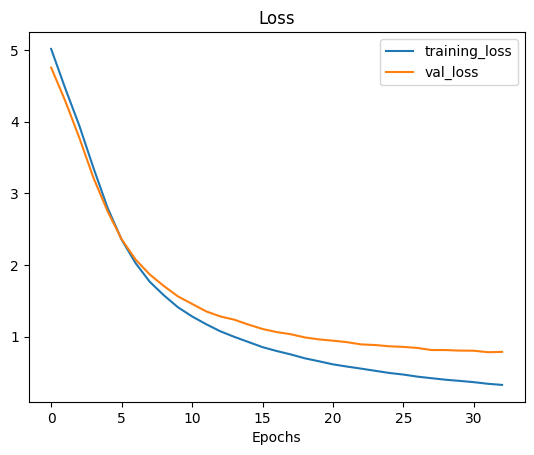

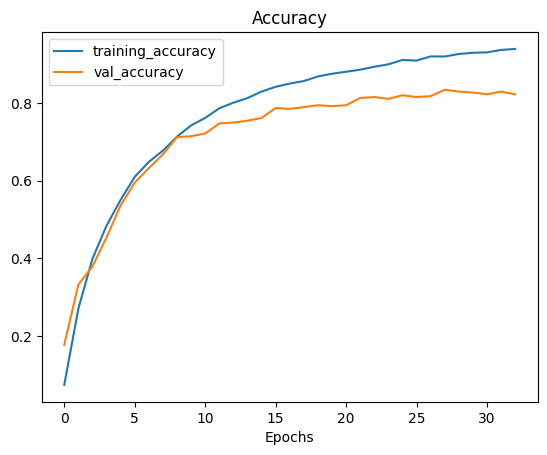

In [ ]:
plot_loss_curves(model_2_history)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get model predictions
predictions = model_2.predict(val_sentences)
predicted_classes = np.argmax(predictions, axis=1)

print(classification_report(val_labels, predicted_classes))

14/14 [==============================] - 1s 43ms/step
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         3
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         5
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         5
          16       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

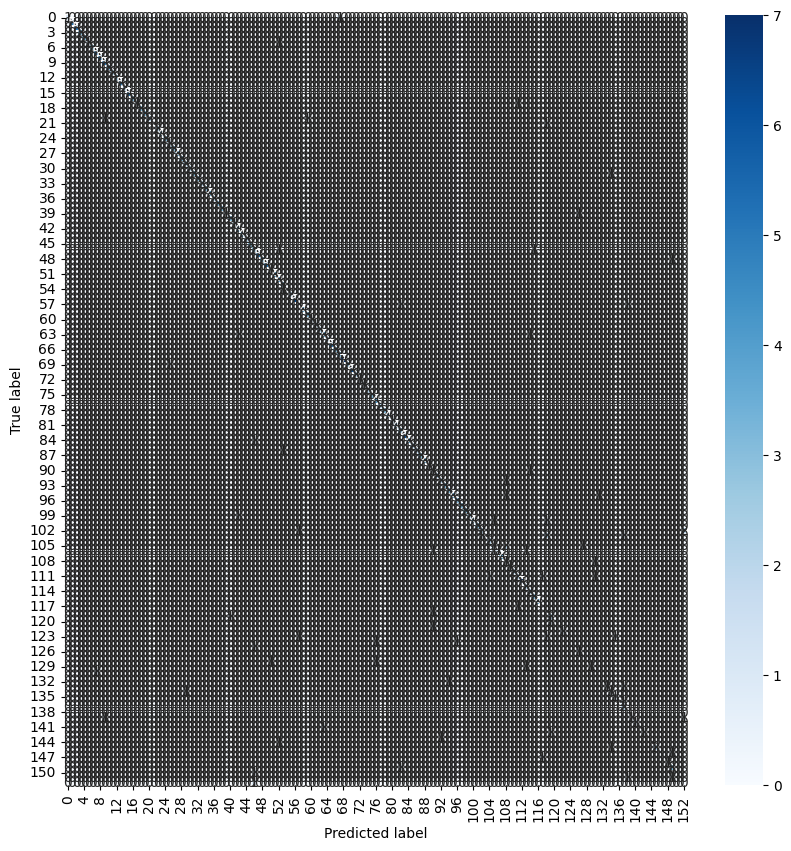

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(val_labels, predicted_classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
def decode_label(encoded_label):
    return reverse_mapping[encoded_label]

# Example:
encoded_label = 170  # this is just an example, you can replace with any valid label in your list
original_atu_id = decode_label(encoded_label)
print(original_atu_id)  # This should give you the original atu_id value for the encoded label



910B


In [ ]:
print(len(label_encoder.classes_))  # Check the number of unique classes
print(reverse_mapping)  # Print out the reverse mapping to see its content


182
{0: '1', 1: '101', 2: '103', 3: '1030', 4: '105', 5: '112', 6: '1137', 7: '113A', 8: '1157', 9: '1161', 10: '1174', 11: '1175', 12: '1176', 13: '1191', 14: '1215', 15: '122E', 16: '122F', 17: '124', 18: '1287', 19: '1288A', 20: '130', 21: '1317', 22: '1319', 23: '1335A', 24: '1342', 25: '1343', 26: '1351', 27: '1353', 28: '1362', 29: '1365', 30: '1377', 31: '1381', 32: '1381D', 33: '1383', 34: '1408', 35: '1415', 36: '1422', 37: '1423', 38: '1430', 39: '1451', 40: '15', 41: '150', 42: '154', 43: '1540', 44: '1548', 45: '155', 46: '1558', 47: '156', 48: '1562A', 49: '1586', 50: '1592', 51: '1592B', 52: '160', 53: '1620', 54: '1626', 55: '1641', 56: '1641C', 57: '1645', 58: '1645B', 59: '1655', 60: '1675', 61: '1676', 62: '1678', 63: '1696', 64: '173', 65: '1730', 66: '1741', 67: '175', 68: '178A', 69: '1791', 70: '1889B', 71: '1965', 72: '2', 73: '2015', 74: '2022', 75: '2025', 76: '2030', 77: '2031C', 78: '2032', 79: '2034F', 80: '2035', 81: '2043', 82: '207C', 83: '20C', 84: '214A

In [ ]:
predicted_original_atu_id = decode_label(90)
print(predicted_original_atu_id)  # This will give you the original atu_id value corresponding to the encoded label 138


244


In [ ]:
#checking which predictions are incorrectly classified.

incorrect_preds = [i for i, (true, pred) in enumerate(zip(val_labels, predicted_classes)) if true != pred]
for idx in incorrect_preds:
    print(f"Sentence: {val_sentences[idx]}")
    print(f"True label: {val_labels[idx]}")
    print(f"Predicted label: {predicted_classes[idx]}\n")

num_incorrect_preds = len(incorrect_preds)
print(f"Number of incorrectly classified sentences: {num_incorrect_preds}")

#where true label = atu_id and predicted label is the encoded label


Sentence: stepping performing veneration repulsion centre sparkling baldric ideal gorgeously superb convulsion nape viciously rip handing tones tenderest unsealed foster sightless etiquette brilliantly attendance sealed gorgeous palanquin virgins attendant rosettes arraying boudoir headgear perfumes palanquins impress overwhelm floods darkening paddle stalwart stripped croaker peerage authority hongs quongs chos hos mins sims kims reciting korea list quandary prospective suitor pooms cripples paddles offended wrongly effrontery brazen imprecating inexorable nirvana retainers poom ban yang peach retailing adopted candy persimmons peaches natives pickle hash chee kim bins seaweed edible piles larder chess choicest partitions papered smoky floors decorators wines sandalwood bales unpacking racks inlaid frocks girdles jeweled gowns ivory hairpins bale undreamed melodious adopting affable hoar starched horsehair donned bullfrogs doused flues woodshed friendliness interestingly froggie board

In [ ]:
# Define the label groups
label_groups = {
    (0, 299): "Animal Tales",
    (300, 749): "Tales of Magic",
    (750, 849): "Religious Tales",
    (850, 999): "Realistic Tales",
    (1000, 1199): "Tales of the Stupid Ogre (Giant, Devil)",
    (1200, 1999): "Anecdotes and Jokes",
    (2000, 2399): "Formula Tales"
}

# Function to get the group description of a label
def get_group(atu_id):
    # Convert atu_id to string if it's not already
    atu_id_str = str(atu_id)

    # Extract the numeric part of the ATU ID
    numeric_part = int(''.join(filter(str.isdigit, atu_id_str)))

    for (low, high), description in label_groups.items():
        if low <= numeric_part <= high:
            return description
    return None  # if ATU ID does not belong to any group



# Function to decode the label
def decode_label(encoded_label):
    return label_encoder.inverse_transform([encoded_label])[0]

# Sort incorrect predictions by true label
sorted_incorrect_preds = sorted(incorrect_preds, key=lambda idx: val_labels[idx])

# Group them
grouped_sentences = {}
for idx in sorted_incorrect_preds:
    group = get_group(decode_label(val_labels[idx]))
    if group not in grouped_sentences:
        grouped_sentences[group] = []
    grouped_sentences[group].append({
        "Sentence": val_sentences[idx],
        "True label": decode_label(val_labels[idx]),
        "Predicted label": decode_label(predicted_classes[idx])
    })

# Now, you can print them out group by group
for group, sentences in grouped_sentences.items():
    print(f"Group: {group}")
    for s in sentences:
        print(f"Sentence: {s['Sentence']}")
        print(f"True label: {s['True label']}")
        print(f"Predicted label: {s['Predicted label']}\n")



Group: Animal Tales
Sentence: har headful accommodate fake curled lazy mis trace stiff mississippi fished louis rabbits heading feigning violin rrling qu brer rabbit ahead string bushes cunning played ha pardon path pretended version lays meal nice mr basket rob field lot decided probably learned granted fishing friends behind tomorrow outwitted hurried trick count stayed seeing hunting lived loved returned distance catch bite boat passed hill eating st hare fox wolf bear front two walking around those middle fish wife large more old us nor been third offered bag river dead near road am found any play once game sense jumped ran wondered going will laughed begged laid under lay find upon while lie by till sight an didn enough right has across along don long full kicked mine put way here not care before were where through caught who morning set back gone away off mind your ll first killed come are what looked down very heard should would if be never get sick other had home this over saw 

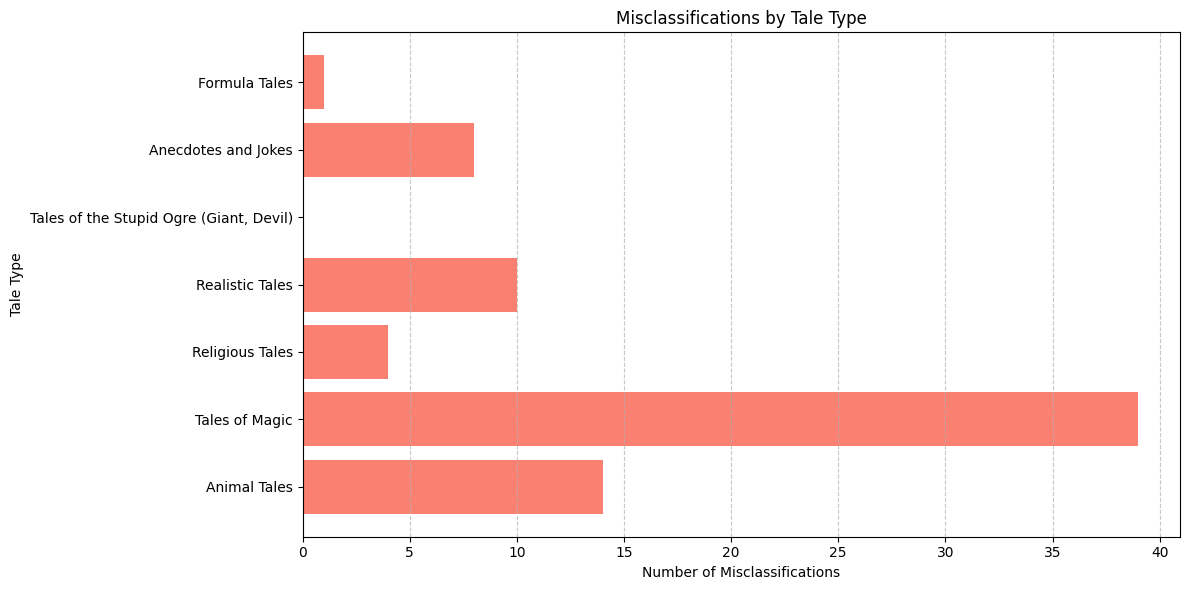

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store misclassification counts
misclassification_counts = {group: 0 for group in label_groups.values()}

# Populate dictionary
for group, sentences in grouped_sentences.items():
    for s in sentences:
        if s['True label'] != s['Predicted label']:
            misclassification_counts[group] += 1

# Plot
labels = list(misclassification_counts.keys())
values = list(misclassification_counts.values())

plt.figure(figsize=(12, 6))
plt.barh(labels, values, color='salmon')
plt.xlabel('Number of Misclassifications')
plt.ylabel('Tale Type')
plt.title('Misclassifications by Tale Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


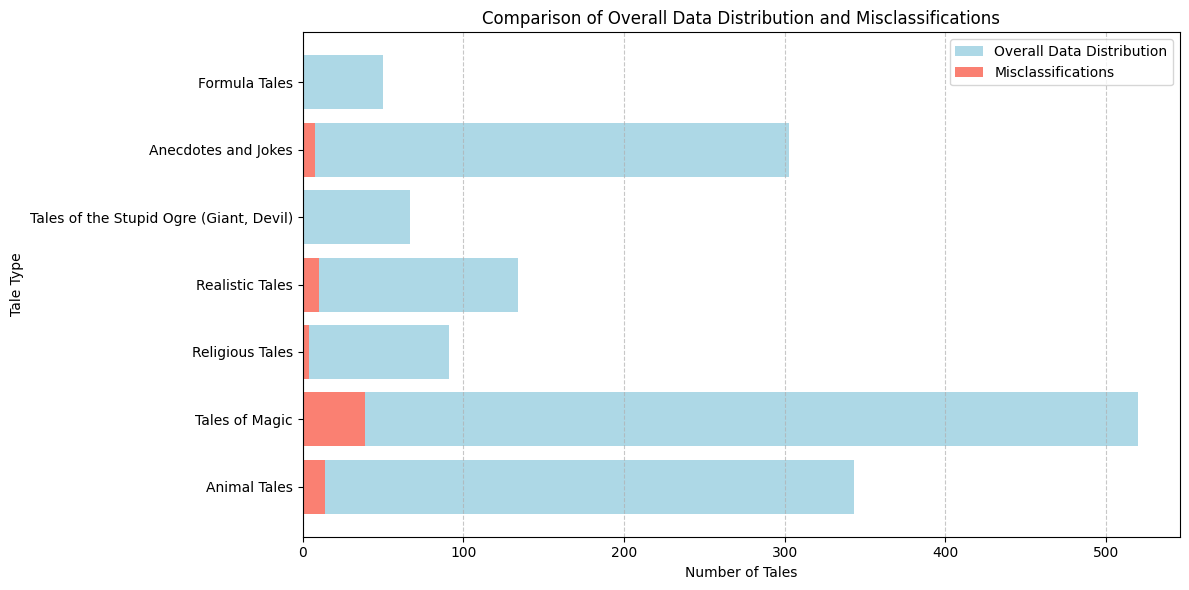

In [ ]:
# Counting the overall distribution of the dataset
overall_counts = Counter(df['atu_id'])

# Extracting just the numeric part of the ATU ID for grouping
def numeric_part(atu_id):
    return int(''.join(filter(str.isdigit, str(atu_id))))

# Group overall data by tale type
overall_group_counts = {group: 0 for group in label_groups.values()}
for atu_id, count in overall_counts.items():
    group = get_group(numeric_part(atu_id))
    if group:
        overall_group_counts[group] += count

# Plot
plt.figure(figsize=(12, 6))

# Plot overall distribution
labels = list(overall_group_counts.keys())
values = list(overall_group_counts.values())
plt.barh(labels, values, color='lightblue', label='Overall Data Distribution')

# Overlay misclassification distribution
misclassification_values = [misclassification_counts[label] for label in labels]
plt.barh(labels, misclassification_values, color='salmon', label='Misclassifications')

plt.xlabel('Number of Tales')
plt.ylabel('Tale Type')
plt.title('Comparison of Overall Data Distribution and Misclassifications')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()


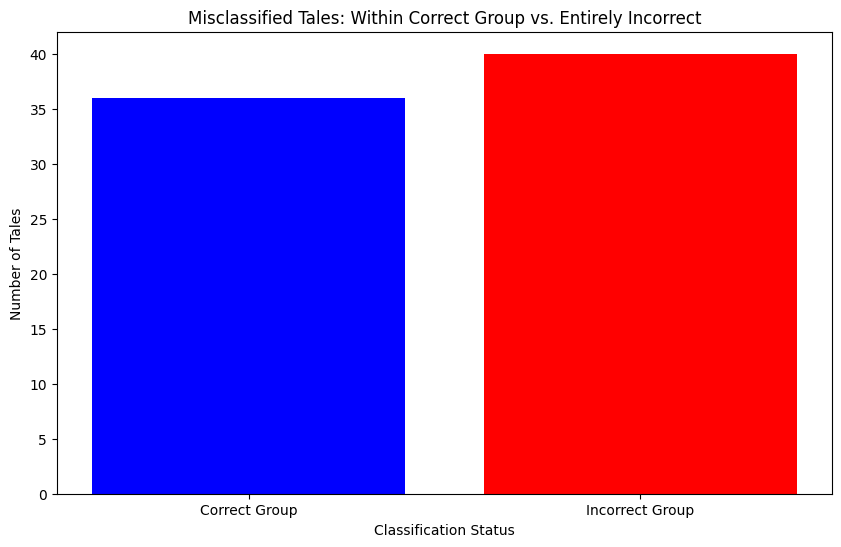

In [ ]:
import matplotlib.pyplot as plt

def is_same_group(true_label, predicted_label):
    return get_group(true_label) == get_group(predicted_label)

same_group_count = 0

for idx in incorrect_preds:
    true_label = decode_label(val_labels[idx])
    predicted_label = decode_label(predicted_classes[idx])

    if is_same_group(true_label, predicted_label):
        same_group_count += 1

# Prepare data for plotting
labels = ['Correct Group', 'Incorrect Group']
counts = [same_group_count, num_incorrect_preds - same_group_count]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Classification Status')
plt.ylabel('Number of Tales')
plt.title('Misclassified Tales: Within Correct Group vs. Entirely Incorrect')
plt.show()


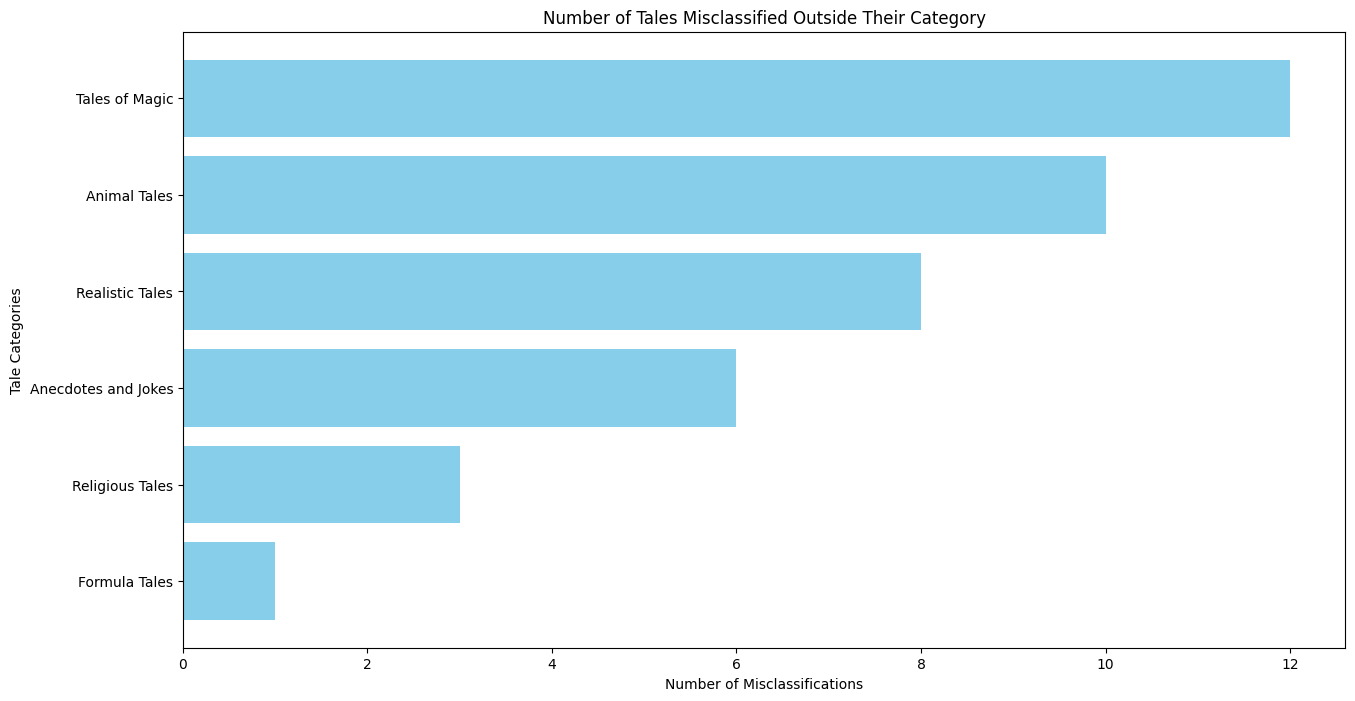

In [ ]:
from collections import defaultdict

misclassification_counts = defaultdict(int)

for idx in incorrect_preds:
    true_label = decode_label(val_labels[idx])
    predicted_label = decode_label(predicted_classes[idx])

    if not is_same_group(true_label, predicted_label):
        # If not in the same group, increment the count for that category
        misclassification_counts[get_group(true_label)] += 1

# Prepare data for plotting
labels = list(misclassification_counts.keys())
counts = list(misclassification_counts.values())

# Sort the data for better visualization
sorted_indices = sorted(range(len(counts)), key=lambda k: counts[k], reverse=True)
labels = [labels[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(15, 8))
plt.barh(labels, counts, color='skyblue')
plt.xlabel('Number of Misclassifications')
plt.ylabel('Tale Categories')
plt.title('Number of Tales Misclassified Outside Their Category')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


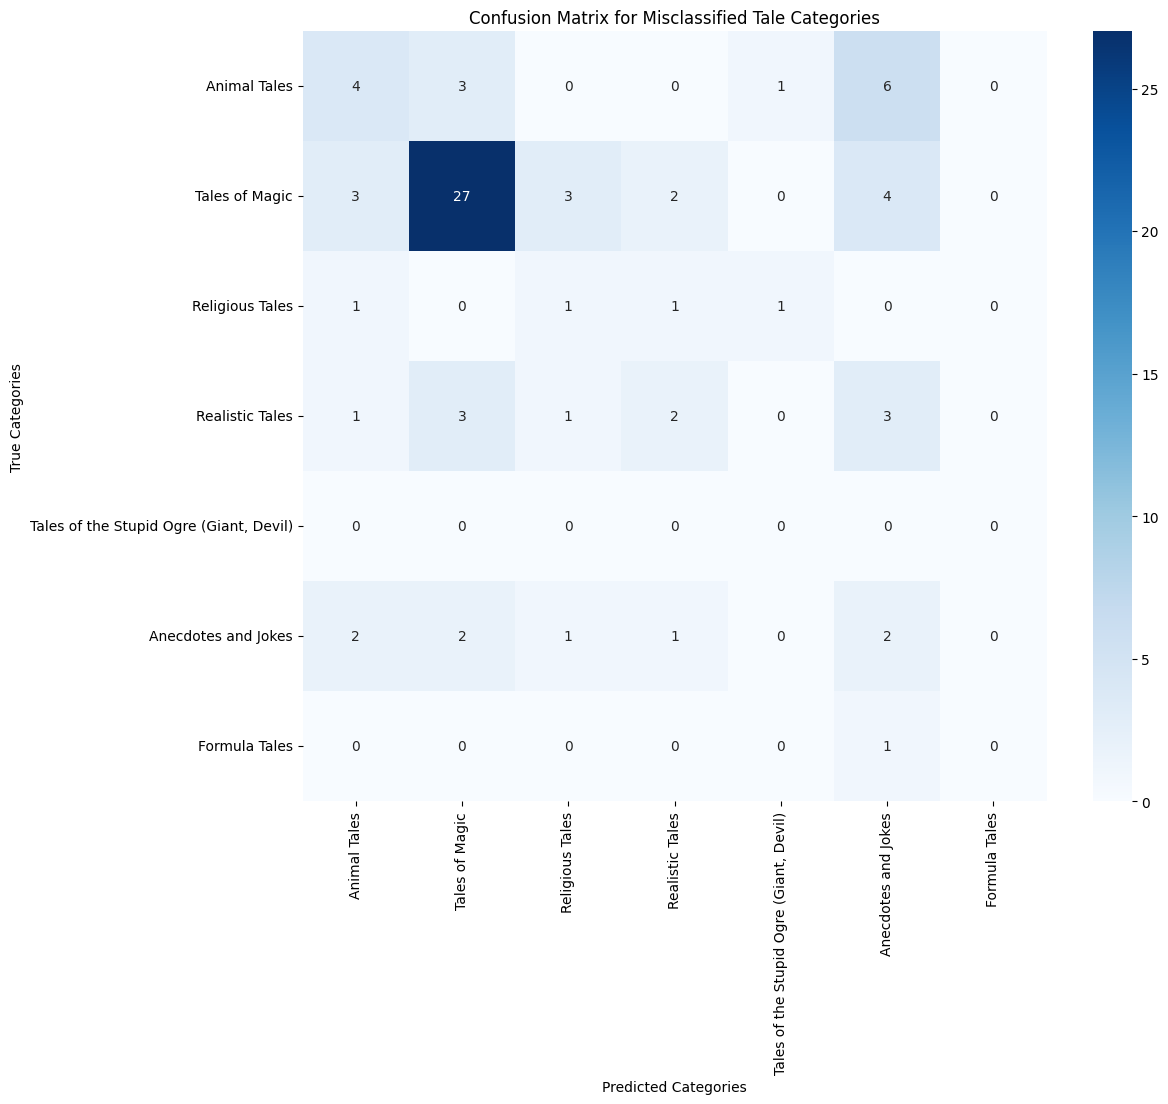

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the group/category for the true and predicted labels
true_categories = [get_group(decode_label(label)) for label in val_labels[incorrect_preds]]
predicted_categories = [get_group(decode_label(predicted)) for predicted in predicted_classes[incorrect_preds]]

# Generate the confusion matrix
matrix = confusion_matrix(true_categories, predicted_categories, labels=list(label_groups.values()))

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_groups.values(), yticklabels=label_groups.values())
plt.xlabel('Predicted Categories')
plt.ylabel('True Categories')
plt.title('Confusion Matrix for Misclassified Tale Categories')
plt.show()


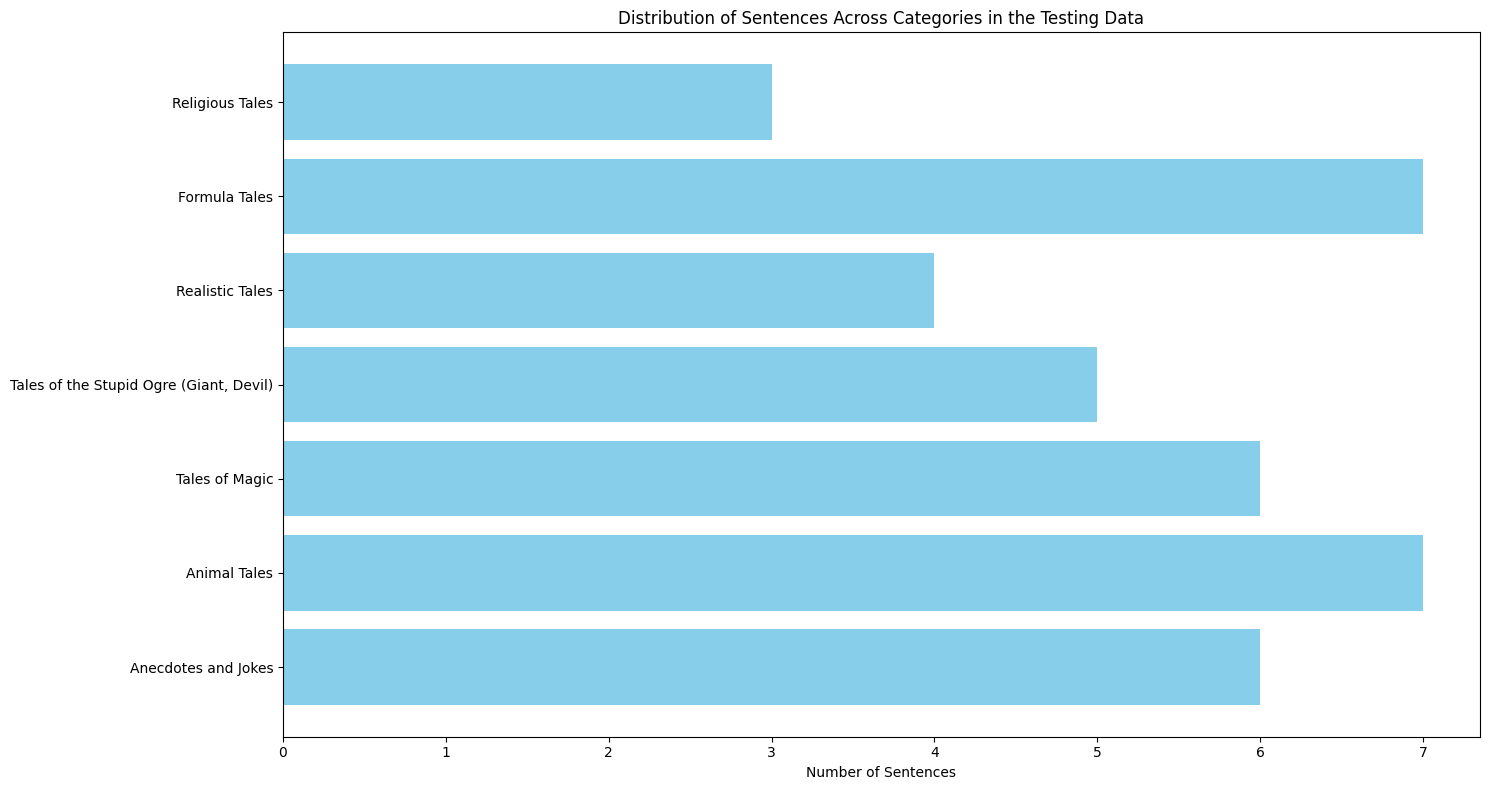

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Convert the true labels in the validation set back to their original ATU IDs
decoded_val_labels = [decode_label(label) for label in val_labels]

# Count the occurrences of each category in the validation set
val_label_counts = Counter(decoded_val_labels)

# Extracting the descriptions for plotting
categories = [get_group(label) for label in val_label_counts.keys()]
counts = val_label_counts.values()

# Plotting
plt.figure(figsize=(15, 8))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Number of Sentences')
plt.title('Distribution of Sentences Across Categories in the Testing Data')
plt.tight_layout()
plt.show()


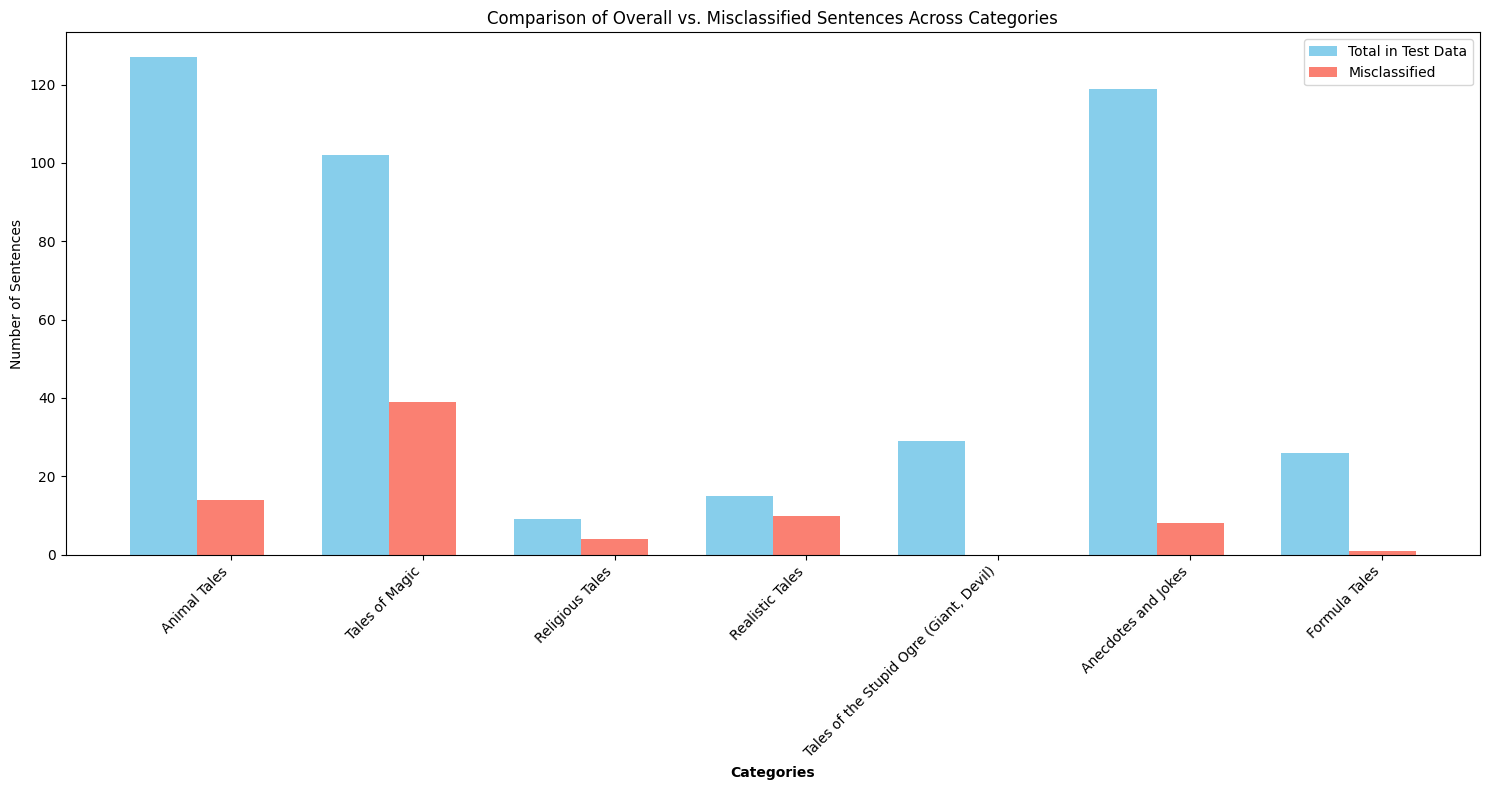

In [ ]:
# Extracting the true labels from misclassified predictions
misclassified_true_labels = [val_labels[idx] for idx in incorrect_preds]

# Count the occurrences of each category in the misclassified sentences
misclassified_label_counts = Counter([get_group(decode_label(label)) for label in misclassified_true_labels])

# Count the occurrences of each category in the validation/test data
total_label_counts = Counter([get_group(decode_label(label)) for label in val_labels])

categories = list(label_groups.values())
counts = [total_label_counts[category] for category in categories]
misclassified_counts = [misclassified_label_counts.get(category, 0) for category in categories]  # Using get() to handle categories that might not have misclassifications

# Plotting
plt.figure(figsize=(15, 8))

# Bar width for better visualization
bar_width = 0.35
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

plt.bar(r1, counts, color='skyblue', width=bar_width, label='Total in Test Data')
plt.bar(r2, misclassified_counts, color='salmon', width=bar_width, label='Misclassified')

plt.xlabel('Categories', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories, rotation=45, ha='right')
plt.ylabel('Number of Sentences')
plt.title('Comparison of Overall vs. Misclassified Sentences Across Categories')
plt.tight_layout()
plt.legend()
plt.show()


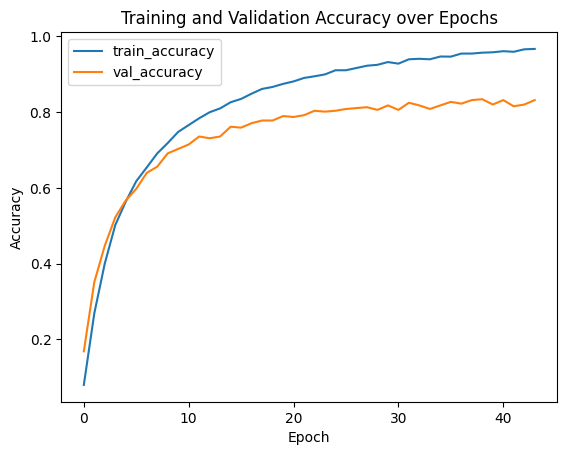

In [ ]:
plt.plot(model_2_history.history['accuracy'], label='train_accuracy')
plt.plot(model_2_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Create model using the Sequential API
model_3 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  # layers.Dense(128, activation="relu"),
  # Dropout(0.2),
  layers.Dense(256, activation="relu"),
  Dropout(0.4),
  layers.Dense(182, activation="softmax")
], name="model_5_USE")

# Compile model
model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Define early stopping callback
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

# Train a classifier on top of pretrained embeddings
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=100,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[early_stop])

Epoch 1/100
120/120 [==============================] - 10s 69ms/step - loss: 4.9208 - accuracy: 0.0758 - val_loss: 4.5726 - val_accuracy: 0.2670
Epoch 2/100
120/120 [==============================] - 6s 54ms/step - loss: 4.2107 - accuracy: 0.2731 - val_loss: 3.9516 - val_accuracy: 0.4262
Epoch 3/100
120/120 [==============================] - 8s 63ms/step - loss: 3.4984 - accuracy: 0.4135 - val_loss: 3.2745 - val_accuracy: 0.4731
Epoch 4/100
120/120 [==============================] - 7s 55ms/step - loss: 2.8469 - accuracy: 0.5125 - val_loss: 2.7044 - val_accuracy: 0.5504
Epoch 5/100
120/120 [==============================] - 8s 63ms/step - loss: 2.3633 - accuracy: 0.5771 - val_loss: 2.3091 - val_accuracy: 0.5995
Epoch 6/100
120/120 [==============================] - 6s 54ms/step - loss: 2.0175 - accuracy: 0.6154 - val_loss: 2.0290 - val_accuracy: 0.6393
Epoch 7/100
120/120 [==============================] - 8s 64ms/step - loss: 1.7756 - accuracy: 0.6496 - val_loss: 1.8093 - val_accuracy

In [ ]:
model_3.evaluate(val_sentences, val_labels)

14/14 [==============================] - 1s 45ms/step - loss: 0.8450 - accuracy: 0.8103


[0.8450212478637695, 0.8103044629096985]

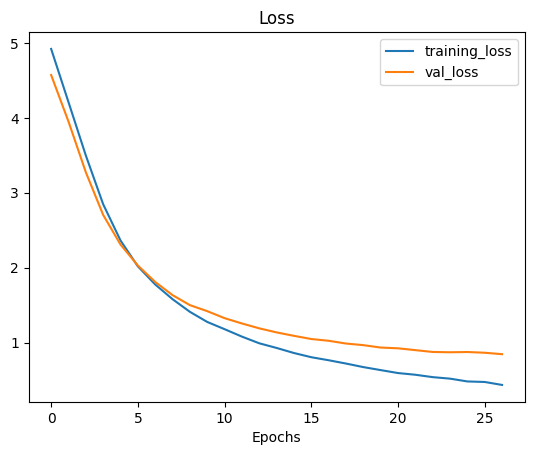

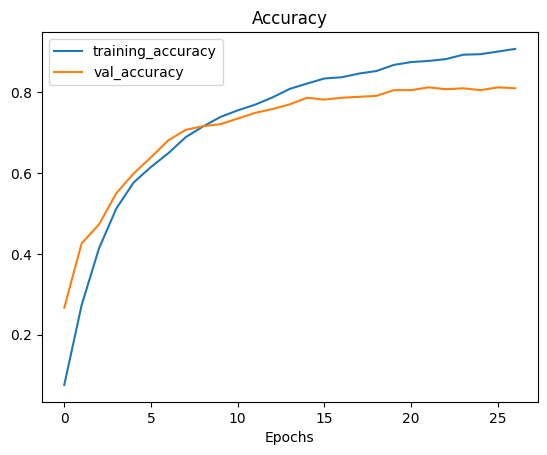

In [ ]:
plot_loss_curves(model_3_history)

In [ ]:
# Create model using the Sequential API
model_4 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  # layers.Dense(128, activation="relu"),
  # Dropout(0.2),
  layers.Dense(256, activation="relu"),
  Dropout(0.4),
  layers.Dense(182, activation="softmax")
], name="model_5_USE")

# Compile model
model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Define early stopping callback
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

# Learning rate scheduler to find best LR
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# Train a classifier on top of pretrained embeddings
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=75,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[early_stop, lr_scheduler])

Epoch 1/75
120/120 [==============================] - 9s 60ms/step - loss: 5.1841 - accuracy: 0.0122 - val_loss: 5.1631 - val_accuracy: 0.0445 - lr: 1.0000e-04
Epoch 2/75
120/120 [==============================] - 7s 63ms/step - loss: 5.1186 - accuracy: 0.0508 - val_loss: 5.0862 - val_accuracy: 0.1030 - lr: 1.1220e-04
Epoch 3/75
120/120 [==============================] - 6s 53ms/step - loss: 5.0128 - accuracy: 0.0834 - val_loss: 4.9710 - val_accuracy: 0.1475 - lr: 1.2589e-04
Epoch 4/75
120/120 [==============================] - 8s 63ms/step - loss: 4.8764 - accuracy: 0.0985 - val_loss: 4.8354 - val_accuracy: 0.1546 - lr: 1.4125e-04
Epoch 5/75
120/120 [==============================] - 6s 53ms/step - loss: 4.7203 - accuracy: 0.1535 - val_loss: 4.6960 - val_accuracy: 0.2763 - lr: 1.5849e-04
Epoch 6/75
120/120 [==============================] - 8s 64ms/step - loss: 4.5709 - accuracy: 0.2212 - val_loss: 4.5588 - val_accuracy: 0.3044 - lr: 1.7783e-04
Epoch 7/75
120/120 [====================

In [ ]:
pd.DataFrame(model_4_history.history).plot(figsize=(10,7), xlabel="epochs");


In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(41)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_4_history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Create model using the Sequential API
model_5 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  # layers.Dense(128, activation="relu"),
  # Dropout(0.2),
  layers.Dense(256, activation="relu"),
  Dropout(0.4),
  layers.Dense(182, activation="softmax")
], name="model_5_USE")

# Compile model
model_5.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0045),
                metrics=["accuracy"])


# Define early stopping callback
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)


# Train a classifier on top of pretrained embeddings
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=100,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[early_stop])

Epoch 1/100
120/120 [==============================] - 9s 67ms/step - loss: 4.9247 - accuracy: 0.0651 - val_loss: 4.5968 - val_accuracy: 0.1827
Epoch 2/100
120/120 [==============================] - 6s 53ms/step - loss: 4.2454 - accuracy: 0.2835 - val_loss: 3.9863 - val_accuracy: 0.4122
Epoch 3/100
120/120 [==============================] - 8s 65ms/step - loss: 3.5490 - accuracy: 0.4096 - val_loss: 3.3242 - val_accuracy: 0.4801
Epoch 4/100
120/120 [==============================] - 6s 54ms/step - loss: 2.8906 - accuracy: 0.4995 - val_loss: 2.7405 - val_accuracy: 0.5457
Epoch 5/100
120/120 [==============================] - 10s 80ms/step - loss: 2.3875 - accuracy: 0.5696 - val_loss: 2.3342 - val_accuracy: 0.6089
Epoch 6/100
120/120 [==============================] - 8s 63ms/step - loss: 2.0445 - accuracy: 0.6146 - val_loss: 2.0441 - val_accuracy: 0.6511
Epoch 7/100
120/120 [==============================] - 7s 57ms/step - loss: 1.7750 - accuracy: 0.6623 - val_loss: 1.8102 - val_accuracy

In [ ]:
model_5.evaluate(val_sentences, val_labels)

14/14 [==============================] - 1s 43ms/step - loss: 0.8326 - accuracy: 0.8150


[0.8326006531715393, 0.8149883151054382]

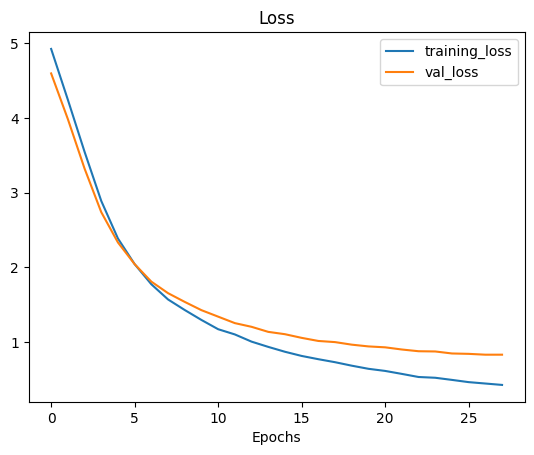

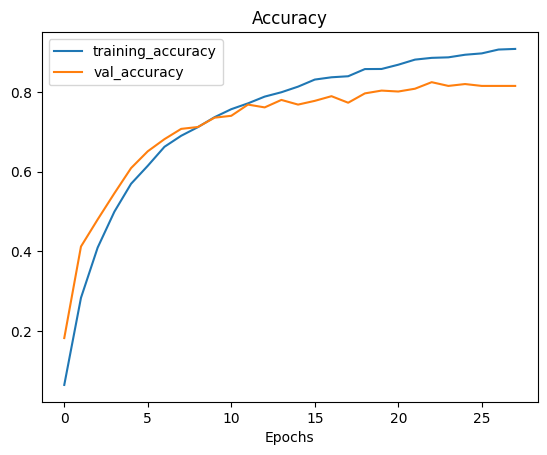

In [ ]:
plot_loss_curves(model_5_history)